In [1]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_trian = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [2]:
import lightgbm as lgb

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
params = { 
    'objective': 'regression', 
    'metric': 'rmse', 
    'boosting_type': 'gbdt', 
    'num_leaves': 100, 
    'learning_rate': 0.005, 
    'feature_fraction': 0.9, 
} 

In [4]:
train_data = lgb.Dataset(X_train,label=Y_train)

In [5]:
num_round = 10
bst = lgb.train(params, train_data, num_round) 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2208
[LightGBM] [Info] Number of data points in the train set: 743, number of used features: 11
[LightGBM] [Info] Start training from score 31.734267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


In [19]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

In [26]:
model = LGBMRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(X_train,Y_train)
n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Convertin

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2208
[LightGBM] [Info] Number of data points in the train set: 743, number of used features: 11
[LightGBM] [Info] Start training from score 31.734267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:355: UserWarning: Converting column-vector to 1d array
  _log_warning("Convertin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 669, number of used features: 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Start training from score 30.218311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [27]:
res = model.predict(X_test)
print(res)

[ 5.72708922 20.88066561  5.37846939  3.43831402 -7.86667257 15.52452358
 11.08230256  8.42386939 10.42973752 17.36927933  3.84109642 32.4614503
 11.58953338 24.12214531  6.50505118 57.6403085  10.4029969  49.31298644
 12.23544298 33.42519774 12.81455578 61.87800501  4.19398083  9.83398232
 11.03603316 13.86710288 64.90880343 19.32745675 63.75181989 10.95908021
 18.43820269 34.58614857  1.50399271 40.6944097  18.32465773 47.24926092
 14.02231024 10.00677374 24.36596381  3.05530992 42.88931955 25.2956772
 72.4572416  25.94727741 17.90636729 21.42849538  4.65640596 44.39954552
 40.03343714 85.34199788 17.8281402   8.38798885 12.74933743  9.58095775
 25.13246869 35.26142775 53.91930629 14.66802926  6.67269401 22.38603336
  3.11890022 49.01352391 15.4324808  41.08293747 16.13094643  8.3773164
 18.5682558   1.78260713 29.3388929  24.72826068 27.82975131 19.11705825
 13.17698336 28.35119895  2.80368836 40.91474101 27.54762032 53.29117799
 17.16321541 19.89589449 21.924052    5.06316211 14.88

In [28]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.7830538288981718


In [9]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

17.100487180740426


In [10]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

2.501987909298991


In [11]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

19.938644151972568


In [12]:
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

In [14]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


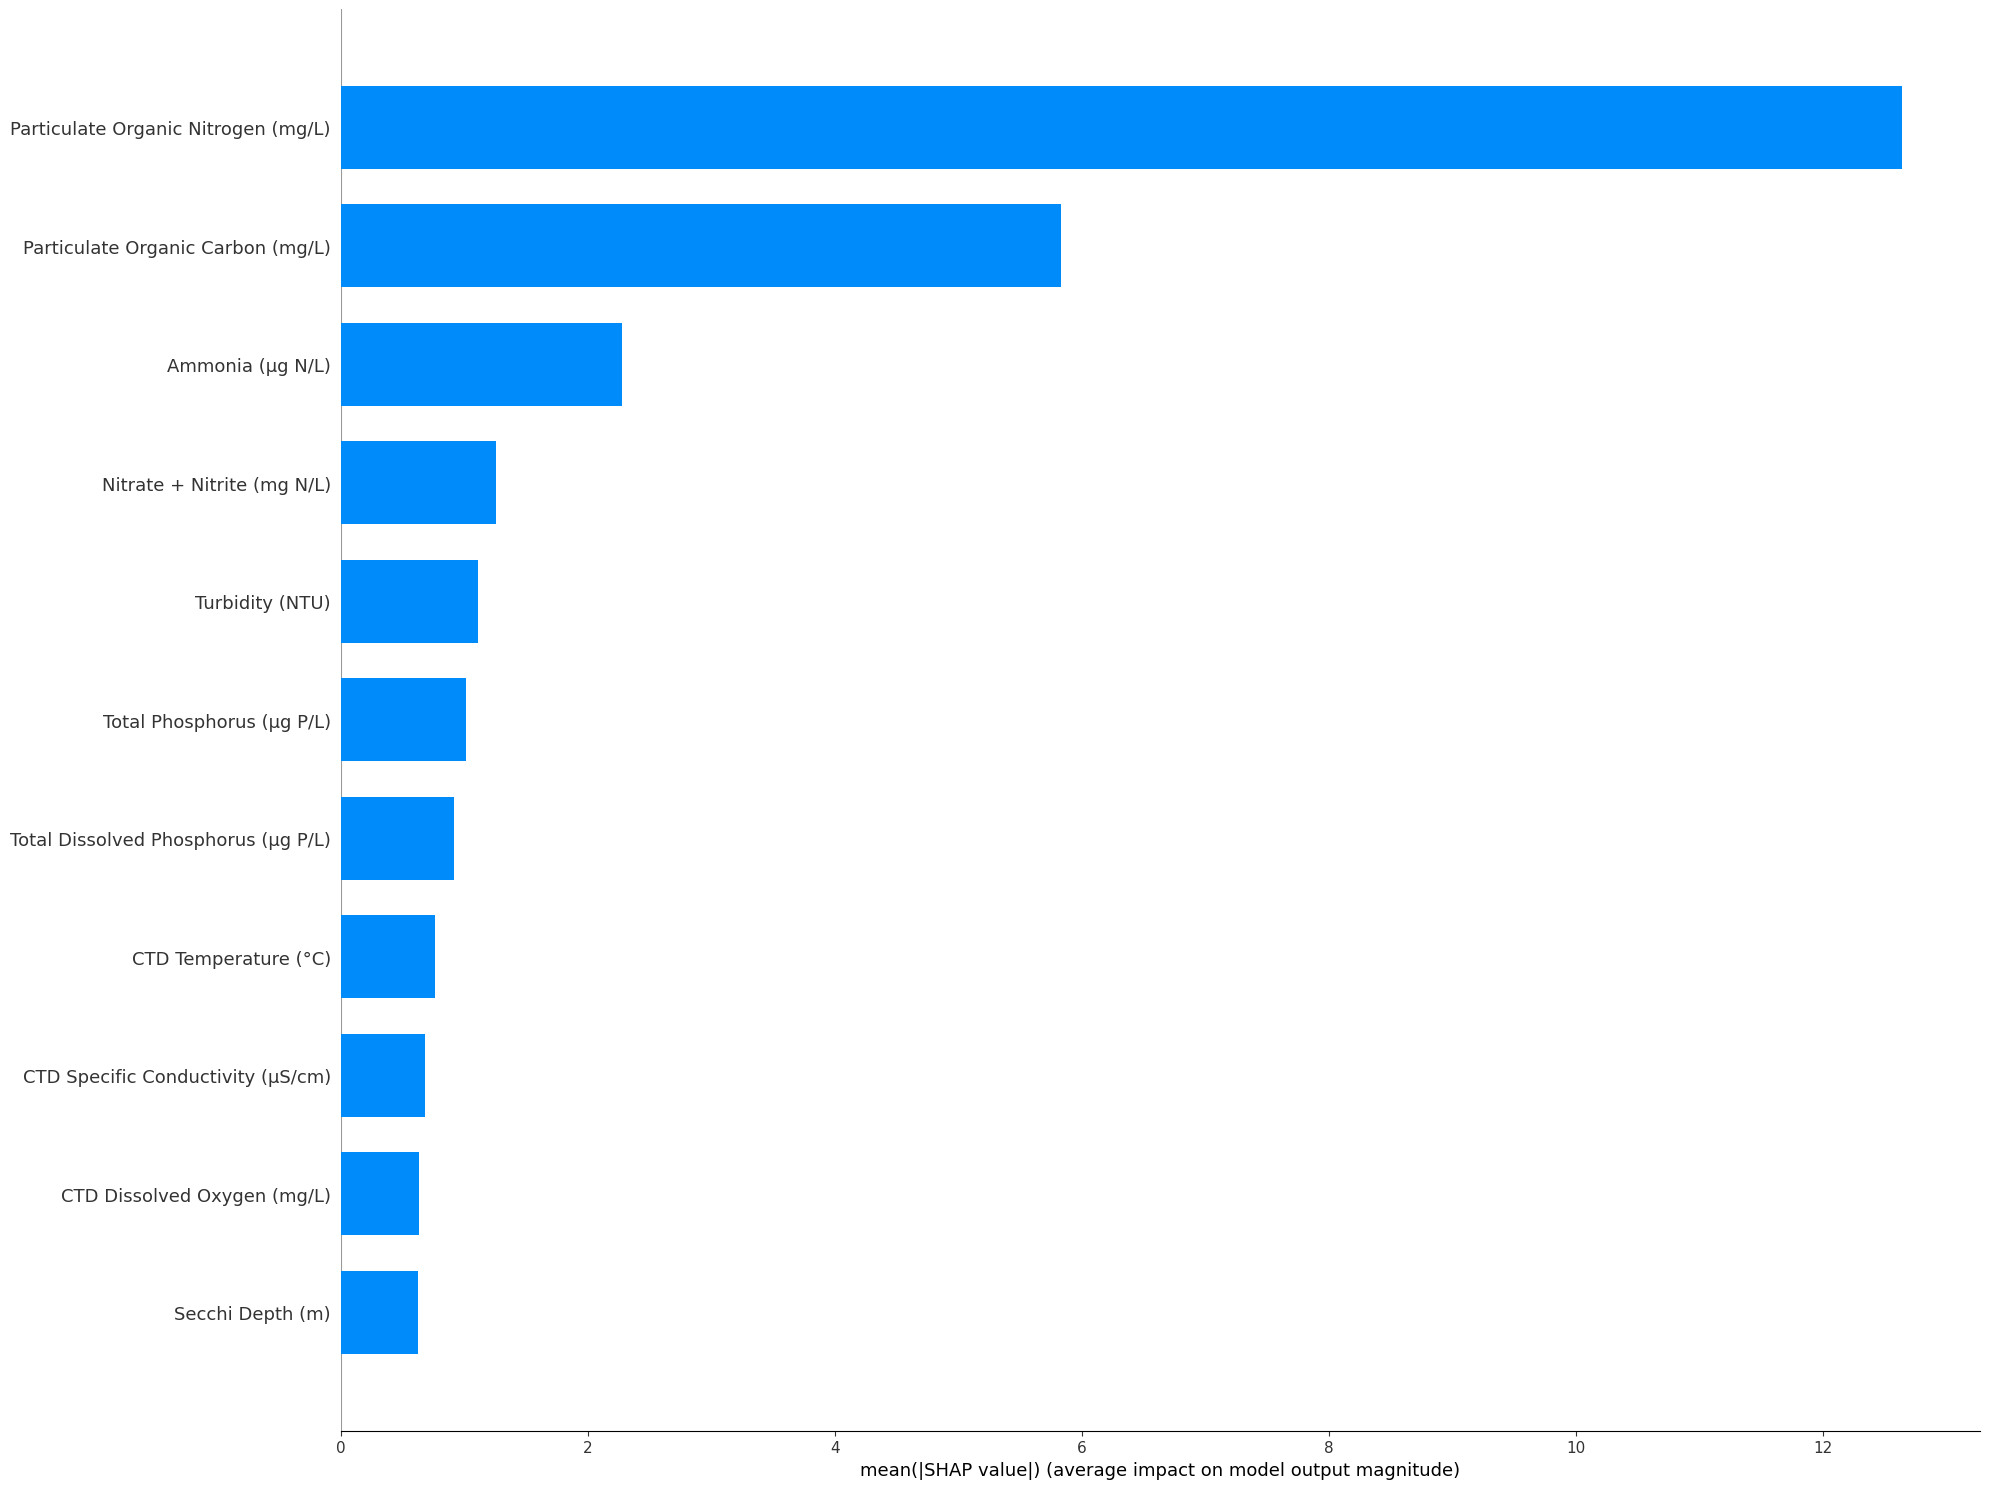

In [15]:
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

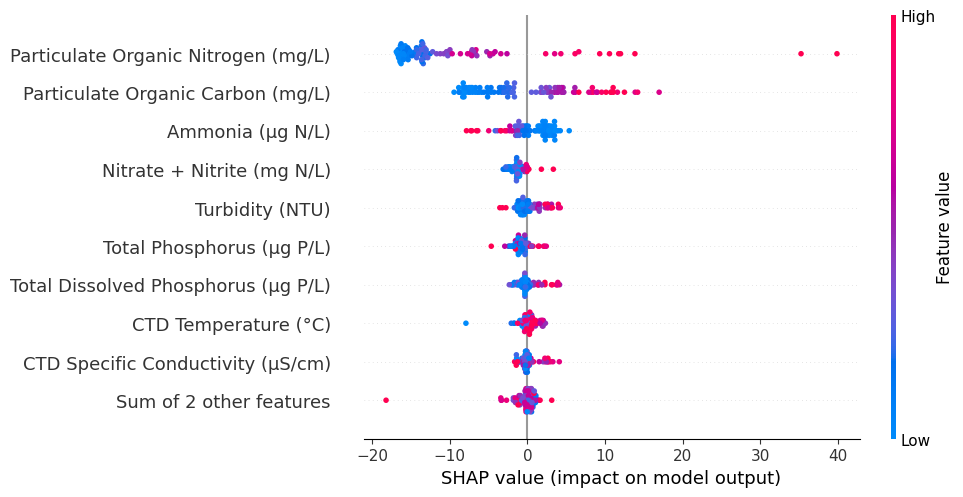

In [29]:
X_test_shap = pd.DataFrame(test.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

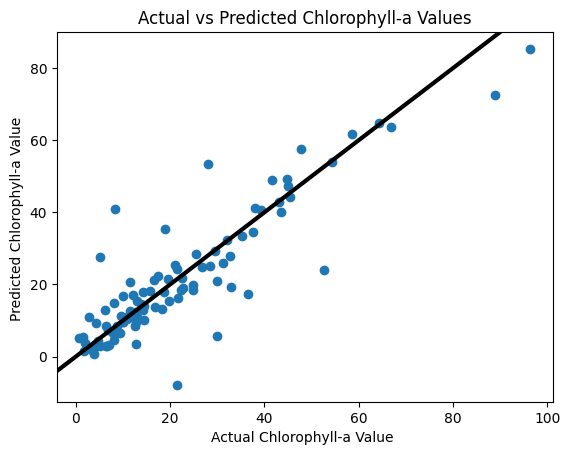

In [32]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()